In [70]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [71]:
def back_substitution(U, y):
    n = U.shape[1]
    x = np.zeros_like(y, dtype=np.double)
    x[-1] = y[-1] / U[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i:], x[i:])) / U[i, i]

    return x

def linsolve_qr(A, b):
    num_param = A.shape[1]
    q, r = scipy.linalg.qr(A) # Q*R*p = y
    return back_substitution(r[0:num_param], (q.T @ b)[0:num_param]) # solve for: R*p = Q.T * y


def gauss_newton(f, df, x, tolerance=1e-14, max_step=100):
    step = 0
    error = np.linalg.norm(f(x))
    while error > tolerance and step < max_step:
        # print(step, x, error)
        x += linsolve_qr(df(x), -f(x))
        error = np.linalg.norm(f(x))
        step += 1

    return x

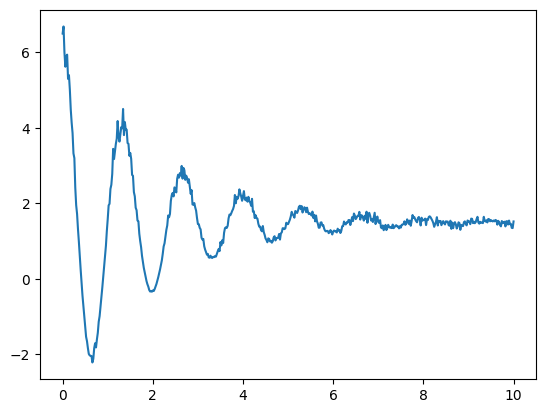

In [72]:
data = np.genfromtxt('7_dataAufgabe2.txt')

t = data[:,0]
s = data[:,1]

plt.plot(t, s)
plt.show()

In [73]:
def f(p):
    (w, tau, a1, a2, c) = p
    return np.exp(tau * t) * (a1 * np.sin(w * t) + a2 * np.cos(w * t)) + c

def fit(p):
    return f(p) - s

def dfit(p):
    (w, tau, a1, a2, c) = p
    return np.array([
        np.exp(t*tau) * t * (a1 * np.cos(t*w) - a2 * np.sin(t*w)),
        np.exp(t*tau) * t * (a1 * np.sin(t*w) + a2 * np.cos(t*w)),
        np.exp(t*tau) * np.sin(t*w),
        np.exp(t*tau) * np.cos(t*w),
        np.ones_like(t)
    ]).T

w0 = 2 * np.pi * 1/1.3
tau0 = 0.1
a10 = 0
a20 = 4.5
c0 = 1.5

(w, tau, a1, a2, c) = gauss_newton(fit, dfit, np.array([w0, tau0, a10, a20, c0]))
print((w, tau, a1, a2, c))

(4.708036244234657, -0.49444356224241687, -0.03126397351435709, 4.973037857246545, 1.5026805754929096)


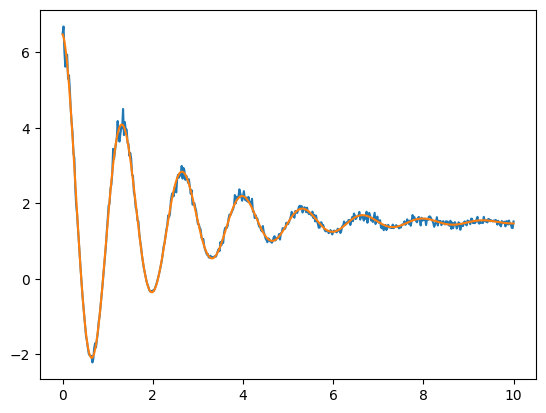

In [74]:
plt.plot(t, s)
plt.plot(t, f((w, tau, a1, a2, c)))
plt.show()